# Validating KNN
* First let me state that these two models are fantastically awful. There doesn't seem to be much of a relationship. It's all very poor. However the increased variance in the weighted model is interesting.

*  Add another feature and mess around with kk and weighting to see if you can do any better than we've done so far.




In [0]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

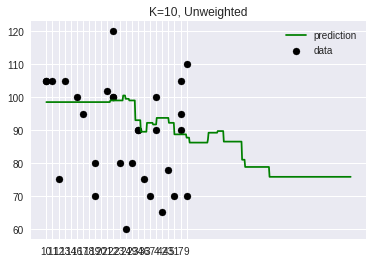

In [7]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

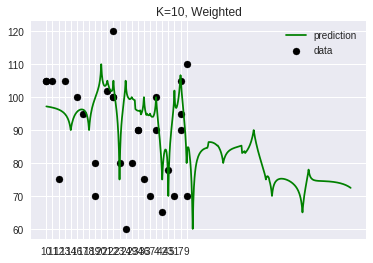

In [8]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [9]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


In [15]:
## Your model here.

# Our input data frame will be the z-scores instead of the raw data and will include duration.
X2 = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})

#Build the model.
k2 = 10
knn2 = neighbors.KNeighborsRegressor(n_neighbors = k2, weights = 'distance')
score2 = cross_val_score(knn2, X2, Y, cv=5)
print('Weighted Accuracy: %0.2f (+/- %0.2f)' % (score2.mean(), score2.std() * 2))

Weighted Accuracy: -0.11 (+/- 1.05)


We are able to improve the weighted accuracy when k = 13 or k = 14.

In [16]:
for k2 in range(1, 24, 1):
  knn2 = neighbors.KNeighborsRegressor(n_neighbors = k2, weights = 'distance')
  score2 = cross_val_score(knn2, X2, Y, cv=5)
  knn.fit(X2, Y)
  print("k = %0.2f\nWeighted Accuracy: %0.2f (+/- %0.2f)" % (k2, score2.mean(), score2.std() * 2))

k = 1.00
Weighted Accuracy: -1.73 (+/- 4.45)
k = 2.00
Weighted Accuracy: -1.06 (+/- 3.27)
k = 3.00
Weighted Accuracy: -0.62 (+/- 2.29)
k = 4.00
Weighted Accuracy: -0.44 (+/- 1.91)
k = 5.00
Weighted Accuracy: -0.43 (+/- 1.99)
k = 6.00
Weighted Accuracy: -0.38 (+/- 1.84)
k = 7.00
Weighted Accuracy: -0.37 (+/- 1.86)
k = 8.00
Weighted Accuracy: -0.23 (+/- 1.48)
k = 9.00
Weighted Accuracy: -0.17 (+/- 1.23)
k = 10.00
Weighted Accuracy: -0.11 (+/- 1.05)
k = 11.00
Weighted Accuracy: -0.11 (+/- 0.98)
k = 12.00
Weighted Accuracy: -0.12 (+/- 0.98)
k = 13.00
Weighted Accuracy: -0.10 (+/- 0.91)
k = 14.00
Weighted Accuracy: -0.10 (+/- 0.90)
k = 15.00
Weighted Accuracy: -0.11 (+/- 0.85)
k = 16.00
Weighted Accuracy: -0.11 (+/- 0.80)
k = 17.00
Weighted Accuracy: -0.12 (+/- 0.79)
k = 18.00
Weighted Accuracy: -0.11 (+/- 0.75)
k = 19.00
Weighted Accuracy: -0.13 (+/- 0.71)
k = 20.00
Weighted Accuracy: -0.13 (+/- 0.71)
k = 21.00
Weighted Accuracy: -0.13 (+/- 0.67)
k = 22.00
Weighted Accuracy: -0.13 (+/- 0.6